In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Multilayer perceptron (MLP) is a fully connected, feedforward neural network architecture. It consists of one input layer, one or more hidden layers, and one output layer. Each layer consists of units (also called neurons, or nodes).

Each unit is connected to every unit in a neighboring layer, hence fully connected. This is why in Keras these layers are called `Dense`. Information flows from left to right, hence feedforward.

<img src=https://i.imgur.com/BMcpMsH.png width="800">

**Learning objectives**

At the end of this DataLab, you will be able to build MLPs using Keras for the following problem types:

 - Regression
 - Binary classification
 - Multi-class classification
 - Multi-label classification
 
For each type, you will be given a suitable dataset. Then you will:

 - Pre-process the data if needed
 - Create a `Sequential()` model.
 - Compile the model by defining a loss function, an optimizer and the metrics to be calculated.
 - Train the model using the `fit()` method.
 - Test the model using the `predict()` and `evaluate()` methods.
 
 
 **Notebook contents**
 
 1. Regression
 2. Binary classification
 3. Multi-class classification
 4. Multi-label classification
 5. Creative brief

## 1. Regression

**The dataset**

In this task, you will use the diabetes dataset provided by `scikit-learn`.

Please read the dataset documentation before you start:

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [2]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
names = diabetes.feature_names
Xy_combined = np.concatenate((X, y[:, np.newaxis]), axis=1)
df = pd.DataFrame(Xy_combined,
                  columns=names + ['disease progression'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((296, 10), (146, 10), (296,), (146,))

**Task 1.1**

Build an MLP suitable for the diabetes dataset. Use a `Sequential()` model and `Dense` layers from Keras. You are free to pick any number of hidden layers and any number of units per layer as long as it works.  Use suitable activation functions.

In [5]:
model = Sequential()

model.add(Dense(1, input_dim=10, activation='linear'))

**Task 1.2**
Using `model.compile()`, compile the model. Select a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [6]:
model.compile(loss='mean_squared_error', optimizer='sgd')

**Task 1.3** Using `model.fit()` Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [7]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
296/296 [==============================] - 0s 843us/step - loss: 8138.1353
Epoch 2/100
296/296 [==============================] - 0s 852us/step - loss: 5955.5615
Epoch 3/100
296/296 [==============================] - 0s 829us/step - loss: 5719.6348
Epoch 4/100
296/296 [==============================] - 0s 818us/step - loss: 5543.0615
Epoch 5/100
296/296 [==============================] - 0s 823us/step - loss: 5319.3335
Epoch 6/100
296/296 [==============================] - 0s 836us/step - loss: 5153.9731
Epoch 7/100
296/296 [==============================] - 0s 825us/step - loss: 4989.2168
Epoch 8/100
296/296 [==============================] - 0s 821us/step - loss: 4867.5767
Epoch 9/100
296/296 [==============================] - 0s 831us/step - loss: 4660.6597
Epoch 10/100
296/296 [==============================] - 0s 841us/step - loss: 4605.2197
Epoch 11/100
296/296 [==============================] - 0s 830us/step - loss: 4509.8530
Epoch 12/100
296/296 [===================

**Task 1.4** Evaluate the model using `model.evaluate()`.

In [8]:
model.evaluate(X_test, y_test, batch_size=1)

146/146 [==============================] - 0s 841us/step - loss: 3043.5276


3043.527587890625

**Task 1.5** Get predictions on `X_test`. Plot `y_test` vs. predictions. On the same plot, plot a $x = y$ line. Think about what this line represents.

5/5 [==============================] - 0s 1000us/step


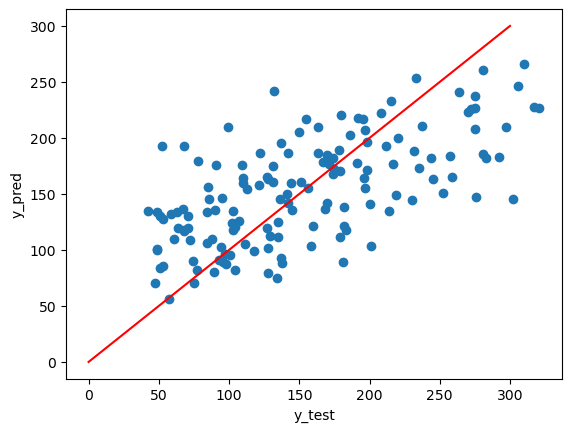

In [9]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([0, 300], [0, 300], 'r')

plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

## 2. Binary classification

**The dataset**

In this task, you will use the breast cancer dataset provided by `scikit-learn`.

Please read the dataset documentation before you start:

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
names = list(cancer.feature_names)
Xy_combined = np.concatenate((X, y[:, np.newaxis]), axis=1)
df = pd.DataFrame(Xy_combined,
                  columns=names + ['Benign'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

**Task 2.1**

Build an MLP suitable for the breast cancer dataset. Use a `Sequential()` model and `Dense` layers from Keras. You are free to pick any number of hidden layers and any number of units per layer as long as it works. Use suitable activation functions.

In [13]:
model_2 = Sequential()
model_2.add(Dense(64, input_dim=30, activation='sigmoid'))
model_2.add(Dense(32, activation='sigmoid'))
model_2.add(Dense(1, activation='sigmoid'))

**Task 2.2**

Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [14]:
model_2.compile(loss='binary_crossentropy', optimizer='adam')

**Task 2.3**

Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [15]:
model_2.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
39/39 - 0s - loss: 0.6476 - 362ms/epoch - 9ms/step
Epoch 2/100
39/39 - 0s - loss: 0.5966 - 41ms/epoch - 1ms/step
Epoch 3/100
39/39 - 0s - loss: 0.5463 - 40ms/epoch - 1ms/step
Epoch 4/100
39/39 - 0s - loss: 0.4693 - 40ms/epoch - 1ms/step
Epoch 5/100
39/39 - 0s - loss: 0.4150 - 41ms/epoch - 1ms/step
Epoch 6/100
39/39 - 0s - loss: 0.3683 - 45ms/epoch - 1ms/step
Epoch 7/100
39/39 - 0s - loss: 0.3314 - 46ms/epoch - 1ms/step
Epoch 8/100
39/39 - 0s - loss: 0.3144 - 50ms/epoch - 1ms/step
Epoch 9/100
39/39 - 0s - loss: 0.3124 - 40ms/epoch - 1ms/step
Epoch 10/100
39/39 - 0s - loss: 0.2988 - 39ms/epoch - 1ms/step
Epoch 11/100
39/39 - 0s - loss: 0.2683 - 38ms/epoch - 966us/step
Epoch 12/100
39/39 - 0s - loss: 0.2564 - 38ms/epoch - 967us/step
Epoch 13/100
39/39 - 0s - loss: 0.2509 - 39ms/epoch - 992us/step
Epoch 14/100
39/39 - 0s - loss: 0.2571 - 44ms/epoch - 1ms/step
Epoch 15/100
39/39 - 0s - loss: 0.2504 - 39ms/epoch - 993us/step
Epoch 16/100
39/39 - 0s - loss: 0.2503 - 39ms/epoch - 1

**Task 2.4**

Evaluate the model using `model.evaluate()`.

In [16]:
model_2.evaluate(X_test, y_test, batch_size=1)

188/188 [==============================] - 0s 954us/step - loss: 0.2039


0.2039424479007721

**Task 2.5**

Plot the confusion matrix for your trained model on the test set.

6/6 [==============================] - 0s 1ms/step


<AxesSubplot: >

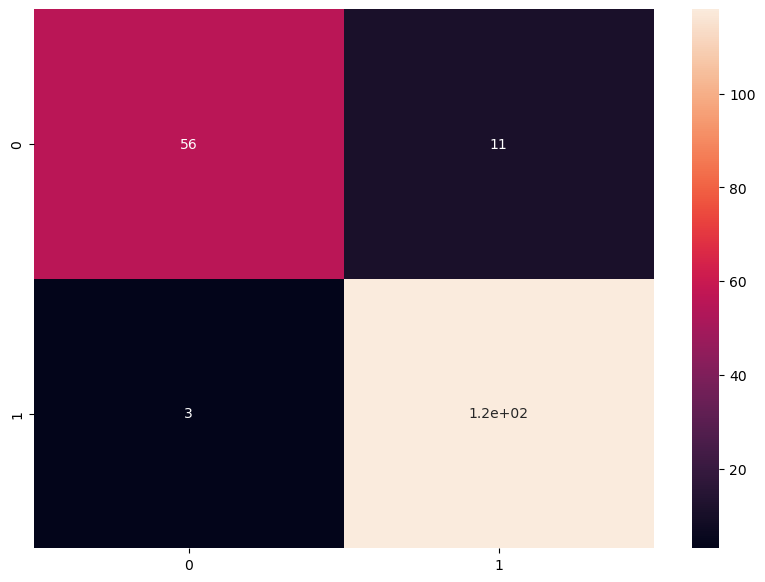

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
plt.xlabel('Predicted')
plt.ylabel('True')

sns.heatmap(cm, annot=True)

## 3. Multi-class classification

**The dataset**

In this task, you will use the MNIST dataset provided by `keras`.

Please read the dataset documentation before you start:

https://keras.io/api/datasets/mnist/

In [18]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Label: 9


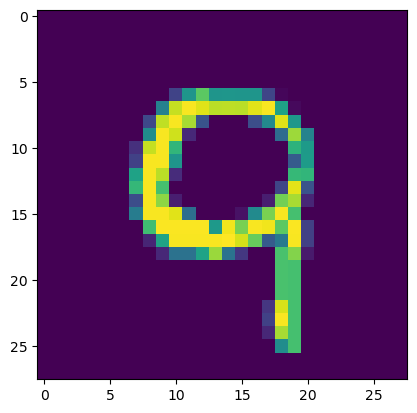

In [19]:
# View random digit
index = np.random.randint(0, 60000)
plt.imshow(X_train[index])
print('Label:', y_train[index])

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

**Task 3.1**

The MLP architecture you will build is given below. 784 input units, two hidden layers with 30 units each, one output layer with 10 units. Notice that X_train shape and input layer shape are not compatible. Similary, y_train and the output layer shape, are not compatible. Preprocess the data to make them compatible. Same is true for the test data.

<img src=https://i.imgur.com/OFNAslJ.png width="500">



In [21]:
from tensorflow.keras.utils import to_categorical
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


**Task 3.2**

Build an MLP suitable for the MNIST dataset. Use a `Sequential()` model and `Dense` layers from Keras. Build the architecture shown in Task 3.1 Use suitable activation functions.

In [22]:
model_3 = Sequential()
model_3.add(Dense(10, input_dim=784, activation='relu'))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

**Task 3.3**

Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [23]:
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Task 3.4**

Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [24]:
model_3.fit(X_train, y_train, epochs=30, batch_size=100)

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 3.2240 - accuracy: 0.1658
Epoch 2/30
600/600 [==============================] - 1s 1ms/step - loss: 1.7614 - accuracy: 0.3571
Epoch 3/30
600/600 [==============================] - 1s 1ms/step - loss: 1.4812 - accuracy: 0.4533
Epoch 4/30
600/600 [==============================] - 1s 1ms/step - loss: 1.2492 - accuracy: 0.5430
Epoch 5/30
600/600 [==============================] - 1s 1ms/step - loss: 1.0181 - accuracy: 0.6172
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.9232 - accuracy: 0.6417
Epoch 7/30
600/600 [==============================] - 1s 1ms/step - loss: 0.8590 - accuracy: 0.6638
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.7965 - accuracy: 0.7007
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.7466 - accuracy: 0.7274
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.7124 - accuracy: 0.7451

**Task 3.5**

Evaluate the model using `model.evaluate()`.

In [25]:
model_3.evaluate(X_test, y_test, batch_size=10)

1000/1000 [==============================] - 1s 985us/step - loss: 0.4413 - accuracy: 0.8754


[0.4412999153137207, 0.8754000067710876]

**Bonus: Task 3.6**

Find the worst prediction. If you struggle with this task, try it later.

In [26]:
# YOUR CODE HERE #

## 4. Multi-label classification

**The dataset**

In this task you will use a simulated dataset.

You are given 4 random integers ($x_1, x_2, x_3, x_4$) between -5 and 5 ($x_i \in [-5, 5]$). Your task is to develop an MLP that predicts parity and sign of the product of these four numbers ($x_1 \times x_2 \times x_3 \times x_4$).

**Definitions**

In mathematics, parity is the property of an integer of whether it is even or odd.

In mathematics, the sign of a real number is its property of being either positive, negative, or zero.

**Example**

$x_1=-1, x_2=1, x_3=-3, x_4=-5$

$ product = x_1 \times x_2 \times x_3 \times x_4 = -15$

parity of -15 is `odd` and sign of -15 is `negative`.

**Columns**

$x_i$: Integers between -5 (inclusive) and 5 (inclusive).

Parity column: $x_1 \times x_2 \times x_3 \times x_4$ is even (0) or odd (1).

Sign column: $x_1 \times x_2 \times x_3 \times x_4$ is negative (-1), or zero (0) or positive (1).

|$x_1$|$x_2$|$x_3$|$x_4$|$Parity$|$Sign$|
|:--|:--|:--|:--|:--|:--|
|-2|-4|-1|1|0|-1|
|-3|5|-3|3|1|1|
|-4|-2|5|3|0|1|
|-4|0|-5|0|0|0|
|1|1|2|-4|0|-1|
|-1|1|-3|-5|1|-1|


In [27]:
def simulator(n):
    
    # x_i numbers with shape (n, 4)
    X = np.random.randint(-5, 6, size=(n, 4))

    # product of 4 numbers for each row
    # this will be used to calculate labels
    # but this won't be part of the dataset
    product = np.prod(X, axis=1)

    # label 1
    parity_col = product % 2
    parity_col = parity_col.reshape(-1, 1)

    # label 2
    pos = (product > 0)*1
    neg = (product < 0)*-1
    zero = (product == 0)*0
    sign_col = pos + neg + zero
    sign_col = sign_col.reshape(-1, 1)

    # concatenate columns to create the dataset
    dataset = np.concatenate((X, parity_col, sign_col), axis=1)
    
    return dataset

In [28]:
dataset = simulator(n=10000)

In [29]:
df = pd.DataFrame(dataset, columns=['x_1', 'x_2', 'x_3', 'x_4', 'Parity', 'Sign'])
df.head(10)

,x_1,x_2,x_3,x_4,Parity,Sign
0,1,3,-1,4,0,-1
1,4,0,0,2,0,0
2,3,-4,-1,-5,0,-1
3,2,4,-4,-5,0,1
4,-1,-1,5,-5,1,-1
5,-4,-5,-1,2,0,-1
6,-5,5,-4,0,0,0
7,0,2,5,4,0,0
8,-2,-1,-2,-3,0,1
9,-1,0,-1,0,0,0


**Task 4.1**

Use the numpy array `dataset` to create `X` and `y`. Preprocess the data if needed.

In [30]:
X = dataset[:, 0:4]
y = dataset[:, 4:6]

X.shape, y.shape

((10000, 4), (10000, 2))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6700, 4), (6700, 2), (3300, 4), (3300, 2))

**Task 4.2**

Build a MLP suitable for this simulated dataset. Use a `Sequential()` model and `Dense` layers from Keras. Use suitable activation functions.

In [33]:
model_4 = Sequential()
model_4.add(Dense(64, input_dim=4, activation='sigmoid'))
model_4.add(Dense(32, activation='sigmoid'))
model_4.add(Dense(2, activation='sigmoid'))

**Task 4.3**

Compile the model by selecting a suitable optimizer and a suitable loss function. Also include a metric or metrics.

In [34]:
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Accuracy()])

**Task 4.4**

Train the model on X_train, y_train and use X_test, y_test as validation data. Pick a suitable number of epochs and batch size.

In [35]:
model_4.fit(X_train, y_train, epochs=30, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.0439 - accuracy: 0.0000e+00 - 452ms/epoch - 2ms/step
Epoch 2/30
210/210 - 0s - loss: 0.0417 - accuracy: 0.0000e+00 - 232ms/epoch - 1ms/step
Epoch 3/30
210/210 - 0s - loss: 0.0452 - accuracy: 0.0000e+00 - 209ms/epoch - 997us/step
Epoch 4/30
210/210 - 0s - loss: 0.0455 - accuracy: 0.0000e+00 - 197ms/epoch - 939us/step
Epoch 5/30
210/210 - 0s - loss: 0.0472 - accuracy: 0.0000e+00 - 203ms/epoch - 969us/step
Epoch 6/30
210/210 - 0s - loss: 0.0468 - accuracy: 0.0000e+00 - 208ms/epoch - 988us/step
Epoch 7/30
210/210 - 0s - loss: 0.0467 - accuracy: 0.0000e+00 - 232ms/epoch - 1ms/step
Epoch 8/30
210/210 - 0s - loss: 0.0483 - accuracy: 0.0000e+00 - 208ms/epoch - 992us/step
Epoch 9/30
210/210 - 0s - loss: 0.0489 - accuracy: 0.0000e+00 - 200ms/epoch - 951us/step
Epoch 10/30
210/210 - 0s - loss: 0.0487 - accuracy: 0.0000e+00 - 206ms/epoch - 982us/step
Epoch 11/30
210/210 - 0s - loss: 0.0499 - accuracy: 0.0000e+00 - 211ms/epoch - 1ms/step
Epoch 12/30
210/210 - 0s - 

## 5. Creative Brief

Now it is time to apply what you learned to your creative brief. Build, train and test an MLP model with Keras on your creative brief dataset.

In [36]:
#YOUR CODE HERE #